### Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import chart_studio.plotly as py
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline
plt.style.use('seaborn-darkgrid')

### Grab Tables as dataframes from csv

In [2]:
eeg = pd.read_csv('EEG_data.csv')
demo = pd.read_csv('demographic_info.csv')

In [3]:
eeg = eeg.rename(columns = {'Attention':'Mental Focus','Mediation':'Calmness','predefinedlabel': 'Confusion Expectation', 'user-definedlabeln': 'Reported Confusion'})
## rename columns for clarity
eeg

,SubjectID,VideoID,Mental Focus,Calmness,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Confusion Expectation,Reported Confusion
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


In [4]:
demo

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


### Merge on subjectID

In [5]:
demo = demo.rename(columns = {'subject ID': 'SubjectID','gender':'gender','age':'age','ethnicity':'ethnicity'})
merged_data = eeg.merge(demo, how = 'inner',on = 'SubjectID')
merged_data.head()

,SubjectID,VideoID,Mental Focus,Calmness,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Confusion Expectation,Reported Confusion,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


### Basic Info

In [6]:
merged_data.shape

(12811, 18)

##### Any Missing values or NA results?

In [7]:
merged_data['Reported Confusion'].count()

12811

In [8]:
merged_data.isna().sum()

SubjectID                0
VideoID                  0
Mental Focus             0
Calmness                 0
Raw                      0
Delta                    0
Theta                    0
Alpha1                   0
Alpha2                   0
Beta1                    0
Beta2                    0
Gamma1                   0
Gamma2                   0
Confusion Expectation    0
Reported Confusion       0
 age                     0
 ethnicity               0
 gender                  0
dtype: int64

##### Eww these are all float values??? Why? none of it even uses a single . value for precision

In [9]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SubjectID              12811 non-null  float64
 1   VideoID                12811 non-null  float64
 2   Mental Focus           12811 non-null  float64
 3   Calmness               12811 non-null  float64
 4   Raw                    12811 non-null  float64
 5   Delta                  12811 non-null  float64
 6   Theta                  12811 non-null  float64
 7   Alpha1                 12811 non-null  float64
 8   Alpha2                 12811 non-null  float64
 9   Beta1                  12811 non-null  float64
 10  Beta2                  12811 non-null  float64
 11  Gamma1                 12811 non-null  float64
 12  Gamma2                 12811 non-null  float64
 13  Confusion Expectation  12811 non-null  float64
 14  Reported Confusion     12811 non-null  float64
 15   a

### Converting Data
##### Gender and Ethnicity are Object Types rather than numbers. I am converting them now to dummy variables for a later section.

In [10]:
merged_data[' gender']= merged_data[' gender'].replace({'M':0,'F':1})
merged_data[' ethnicity']= merged_data[' ethnicity'].replace({'Bengali':0,'English':1, 'Han Chinese':2})

#### Also, none of this needs to be stored as a float. Time to fix that.

In [11]:
merged_data['SubjectID'] = merged_data['SubjectID'].astype(int)
merged_data['VideoID'] = merged_data['VideoID'].astype(int)
merged_data['Mental Focus'] = merged_data['Mental Focus'].astype(int)
merged_data['Calmness'] = merged_data['Calmness'].astype(int)
merged_data['Raw'] = merged_data['Raw'].astype(int)
merged_data['Delta'] = merged_data['Delta'].astype(int)
merged_data['Theta'] = merged_data['Theta'].astype(int)
merged_data['Alpha1'] = merged_data['Alpha1'].astype(int)
merged_data['Alpha2'] = merged_data['Alpha2'].astype(int)
merged_data['Beta1'] = merged_data['Beta1'].astype(int)
merged_data['Beta2'] = merged_data['Beta2'].astype(int)
merged_data['Gamma1'] = merged_data['Gamma1'].astype(int)
merged_data['Gamma2'] = merged_data['Gamma2'].astype(int)
merged_data['Confusion Expectation'] = merged_data['Confusion Expectation'].astype(int)
merged_data['Reported Confusion'] = merged_data['Reported Confusion'].astype(int)
data= merged_data
data.head()

,SubjectID,VideoID,Mental Focus,Calmness,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Confusion Expectation,Reported Confusion,age,ethnicity,gender
0,0,0,56,43,278,301963,90612,33735,23991,27946,45097,33228,8293,0,0,25,2,0
1,0,0,40,35,-50,73787,28083,1439,2240,2746,3687,5293,2740,0,0,25,2,0
2,0,0,47,48,101,758353,383745,201999,62107,36293,130536,57243,25354,0,0,25,2,0
3,0,0,47,57,-5,2012240,129350,61236,17084,11488,62462,49960,33932,0,0,25,2,0
4,0,0,44,53,-8,1005145,354328,37102,88881,45307,99603,44790,29749,0,0,25,2,0


#### Whoever set up this data had the correct idea of preventing null values in the columns. Which I checked for earlier. However, that just made the  ****heads who entered the data put 0 instead of null where they lacked data... Across all data subject 6 has no records for Mental Focus or Calmness and was defaulted to 0 instead of null. Additionally some of the values for subject 3 also have this issue.

##### The number of 0 entries messing up my data

In [12]:
count=(data['Mental Focus']==0).sum()
count

1423

##### subject 6 is the main culprit for most of that...

In [13]:
data.loc[data['SubjectID'] == 6] ## see the lack of values in MentalFocus and Calmness

,SubjectID,VideoID,Mental Focus,Calmness,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Confusion Expectation,Reported Confusion,age,ethnicity,gender
7717,6,0,0,0,-2048,493042,58588,48157,22146,18002,28329,18930,8859,0,1,24,2,0
7718,6,0,0,0,-301,399516,115933,13360,16585,22777,10513,15767,4777,0,1,24,2,0
7719,6,0,0,0,1777,3038386,2417589,77769,392542,216529,662647,198248,284286,0,1,24,2,0
7720,6,0,0,0,2047,928248,506625,172735,266638,76342,105064,67176,80974,0,1,24,2,0
7721,6,0,0,0,-2048,1019488,323193,190457,183909,124942,94278,73541,44500,0,1,24,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,6,9,0,0,2047,1093827,252836,176213,76830,106708,127177,109427,104078,1,0,24,2,0
8988,6,9,0,0,-345,1386821,185936,78351,161642,237194,78602,127199,74792,1,0,24,2,0
8989,6,9,0,0,-2048,37956,16445,728,2516,12741,4028,1884,6989,1,0,24,2,0
8990,6,9,0,0,2042,16068,97095,2759,4807,9158,5315,3486,2214,1,0,24,2,0


#### So I decided to purge subjectID 3 and 6 to eliminate the bad data



In [14]:
data = data.query('(SubjectID != 3) & (SubjectID != 6)')  #query where ID is not 3 or 6 is now new dataset

### Some analysis
#### Videos and subject confusion bar graphs

<AxesSubplot:title={'center':'Confusion by Subject'}, xlabel='SubjectID', ylabel='Count'>

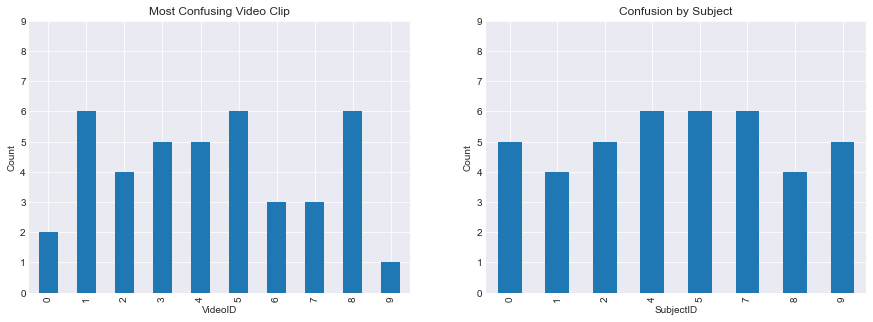

In [15]:
subjectxvideo= data.groupby(['SubjectID', 'VideoID'])['Reported Confusion'].agg(lambda x: sum (x) > 0).unstack("VideoID")
confusion= plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ylim([0,9])
subjectxvideo.apply(sum).plot(kind='bar', title='Most Confusing Video Clip', ylabel='Count')

plt.subplot(1,2,2)
plt.ylim([0,9])
subjectxvideo.apply(sum, axis=1).plot(kind='bar', title='Confusion by Subject', ylabel='Count')

In [16]:
subjectxvideo

VideoID,0,1,2,3,4,5,6,7,8,9
SubjectID,,,,,,,,,,
0,False,True,True,False,False,True,True,False,True,False
1,False,True,True,True,True,False,False,False,False,False
2,False,True,False,False,True,True,False,True,True,False
4,False,True,True,True,False,False,True,True,True,False
5,False,True,True,True,False,True,True,False,True,False
7,True,True,False,True,True,True,False,True,False,False
8,False,False,False,False,True,True,False,False,True,True
9,True,False,False,True,True,True,False,False,True,False


#### A quick boxplot overview of the data. Brainwaves spike a lot, leading to outlier data. But the box plots were able to find inter quartile ranges just fine. 

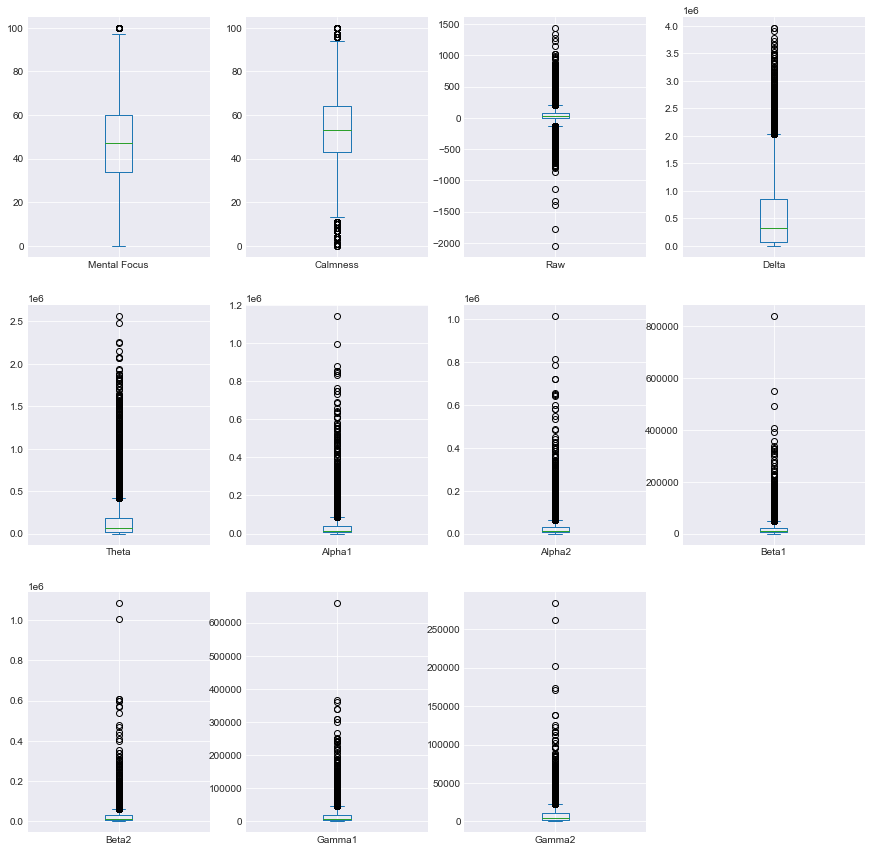

In [17]:
brainwaves = ['Mental Focus', 'Calmness', 'Raw', 'Delta','Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']

data[brainwaves].plot(kind='box',figsize=(15,15),subplots=True,layout=(3,4))

plt.show()

### Some seaborn action
#### Jointplot Low Calmness or Low Focus results in more responses of confusion. With mental focus being larger factor. You can learn while a little stressed, but not as well when not focused on task!

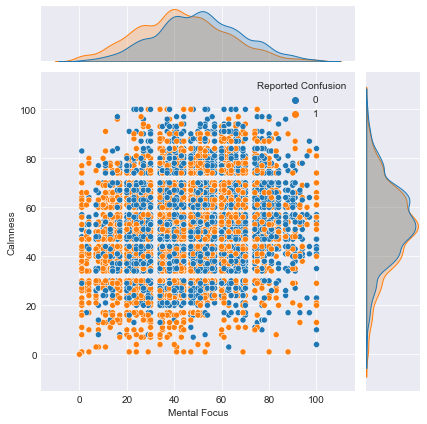

In [18]:
sns.jointplot(x='Mental Focus' ,y='Calmness' , data=data,hue='Reported Confusion')

#### Histograms of calmness and focus over the course of the study. Some pretty normal looking distributions here. Nothing out of the ordinary.

<AxesSubplot:xlabel='Mental Focus', ylabel='Count'>

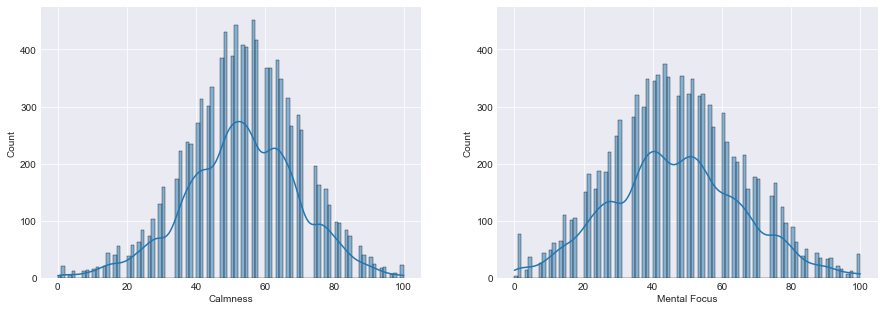

In [19]:
multihist= plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ylim([0,475])
sns.histplot(data['Calmness'],kde=True, bins=100)
plt.subplot(1,2,2)
plt.ylim([0,475])
sns.histplot(data['Mental Focus'],kde=True, bins=100)

#### Correlation Heatmap!  Delta and Theta (Zzz Waves) negative corr with focus. While many of the brainwave types have strong positive correlation. 

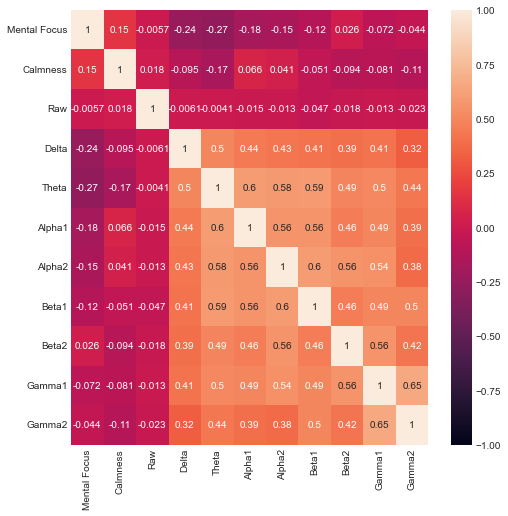

In [20]:
correlation = data[brainwaves].corr()
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
plt.show()

#### Subject 9 had an interesting response to starting halfway into a video on a topic he was unfamilar with

<AxesSubplot:title={'center':'Subject 9 BrainwavesWhile Not Confused'}, ylabel='Hertz(Hz)'>

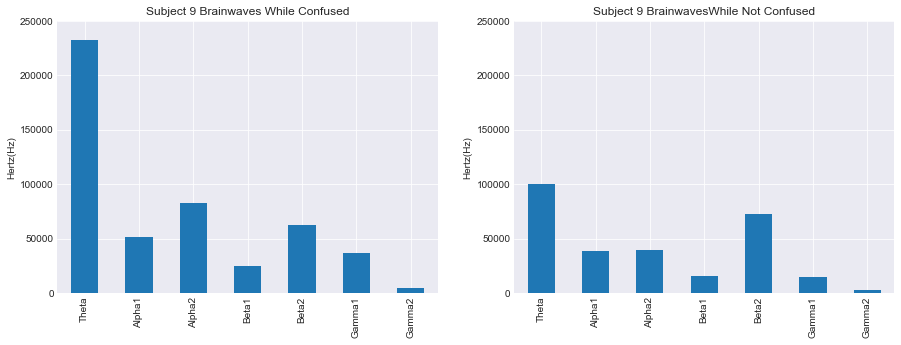

In [21]:
data1 = data.query('SubjectID==9 & VideoID==0')
data2 = data.query('SubjectID==9 & VideoID==1') 
mean1=data1[brainwaves].mean()
mean2=data2[brainwaves].mean()
split1 = ['Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']
split2 = ['Mental Focus', 'Calmness', 'Raw']
asdf= plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ylim([0,250000])
mean1[split1].plot(kind='bar', title='Subject 9 Brainwaves While Confused', ylabel='Hertz(Hz)')
plt.subplot(1,2,2)
plt.ylim([0,250000])
mean2[split1].plot(kind='bar', title='Subject 9 BrainwavesWhile Not Confused', ylabel='Hertz(Hz)')

#### Subject 9 gave up when confused. His focus dropped and his calmness went up past productive levels.

<AxesSubplot:title={'center':'Subject 9 Not Confused'}>

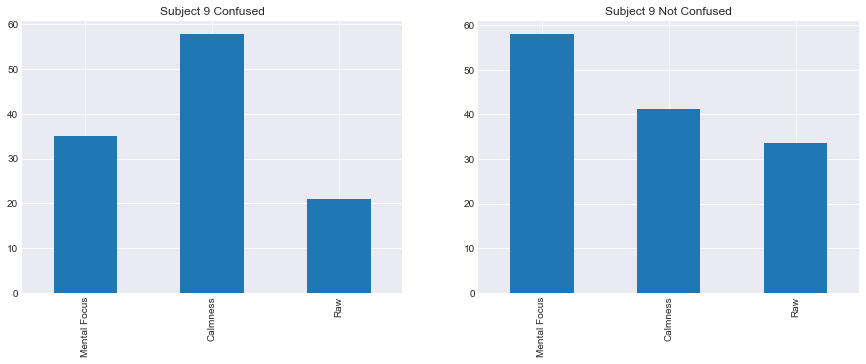

In [22]:
asdf2= plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
mean1[split2].plot(kind='bar', title='Subject 9 Confused')

plt.subplot(1,2,2)
mean2[split2].plot(kind='bar', title='Subject 9 Not Confused')

#### In general in the data a mental focus value of between 50-60 occurs with a familar topic with calmness sitting between 40-50 However, the study was posed in a way to prevent learning by starting half way though a confusing topic, often leading to the subjects zoning out (losing focus and spiking brainwaves associated with sleep/rest and calmness)

In [23]:
data1[brainwaves].iplot()
plt.show()

#### We do see an interesting statistic for any video clip in which the subject is familiar with the topic(remember all clips start mid topic). They  have an initial spike of mental focus and a sharp drop in calmess that levels back out 1/3 of the way into the test. This is likely related to the brain rushing to fill in the missing information and gather context clues sparked by the familiar topic. After this spike you can see, as mentioned above that calmness is a bit lower but focus is a bit higher when the topic is familiar but learning is still occuring rather than confusion. 

In [24]:
data2[brainwaves].iplot()
plt.show()

#### Our observation with Subject 9 holds true across the dataset. In cases of reported confusion with a video the overall mental focus was shown to be less than cases with no confusion.

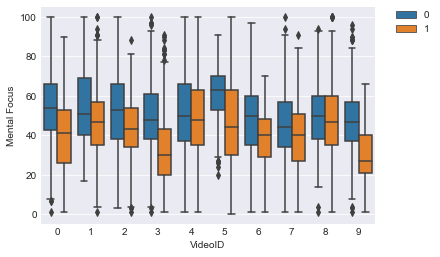

In [25]:
sns.boxplot(x='VideoID', y='Mental Focus', data=data, hue='Reported Confusion')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Training Models


In [26]:
datafilter = data[['VideoID', 'Mental Focus', 'Alpha2', 'Delta', 'Gamma1', 'Theta', 'Beta1','Alpha1', 'Calmness',
                    'Gamma2', 'SubjectID','Beta2', 'Raw', ' age', ' ethnicity', ' gender']]
X=datafilter
y=data["Reported Confusion"]
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=3)


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model_tree = DecisionTreeClassifier(max_depth=8)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

#### Decision Tree training

In [29]:
pred_tree = model_tree.predict(X_test)

print("Test Accuracy: {:.5f}".format(accuracy_score(y_test, pred_tree)))

Test Accuracy: 0.84382


 #### Due to data set size random forest performs better than decision tree for accuracy

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(max_features=15)
rfc.fit(X_train,y_train)
rfc_pred= rfc.predict(X_test)
print("Test Accuracy: {:.5f}".format(accuracy_score(y_test, rfc_pred)))

Test Accuracy: 0.99022


#### 98% accuracy is pretty good. I could pass it some fine tuned parameters, but that may result in overfitting. So I will leave it be.

In [31]:
classification_report(y_test,rfc_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      1504\n           1       0.99      0.99      0.99      1563\n\n    accuracy                           0.99      3067\n   macro avg       0.99      0.99      0.99      3067\nweighted avg       0.99      0.99      0.99      3067\n'

In [32]:
confusion_matrix(y_test,rfc_pred)

array([[1486,   18],
       [  12, 1551]], dtype=int64)

### Possibility of Cross-Doman viablity
#### Since this data set can map the presence of confusion to eeg results, it could be cross-domained into identifying patients with abnormal mental state, developmental issues, or any other number of confusion causing conditions if given a similar breakdown of eeg results into different wave frequencies. 